# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2000-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [2]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code

###YOUR CODE HERE###

In [3]:
## Infant mortality
IM = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)

In [4]:
columnNames = [str(x) + '-' + str(x+5) for x in range(2000, 2015, 5)]
IM = IM[columnNames]

In [5]:
IM.head()

,2000-2005,2005-2010,2010-2015
Afghanistan,89.53,79.51,71.12
Albania,20.25,16.11,14.42
Algeria,37.45,34.18,30.28
Angola,116.05,104.35,96.22
Argentina,15.04,14.61,13.69


In [6]:
## GDP
GDP = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 

In [7]:
drop_columns = [str(i) for i in range(1980, 2000)]
drop_columns.extend(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'])
GDP.drop(columns = drop_columns, inplace = True)
GDP.fillna(np.nan, inplace = True)

In [8]:
GDP.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,196.683,195.27,214.23,248.049,270.189,324.705,380.91,435.472,539.667,614.661,680.5,660.221,650.663,615.091
Albania,"1,127.64","1,283.57","1,425.13","1,846.12","2,373.58","2,673.73","2,975.62","3,594.10","4,377.04","4,130.93","4,098.13","4,439.56","4,249.04","4,413.28","4,574.80","3,946.00"
Algeria,"1,794.70","1,768.58","1,806.86","2,128.39","2,636.31","3,141.03","3,508.96","3,986.56","4,943.50","3,886.06","4,480.72","5,430.57","5,574.20","5,475.71","5,458.88","4,174.82"
Angola,535.473,508.857,690.923,761.596,"1,023.52","1,428.46","2,052.72","2,882.80","3,897.51","3,393.55","3,599.27","4,411.58","4,744.88","4,988.92","4,915.92","3,876.20"
Antigua and Barbuda,"10,368.64","10,063.80","10,326.85","10,693.95","11,315.24","12,428.74","13,995.04","15,725.92","16,259.67","14,403.92","13,413.49","13,205.07","13,929.37","13,733.96","13,818.57","14,100.43"


In [9]:
drop_index = []

#TODO: modify data type as float type
for columnNum in [str(num) for num in range(2000, 2016)]:
    for i in range(len(GDP[columnNum])):
        if isinstance(GDP[columnNum][i], str):
            GDP[columnNum][i] = np.float(GDP[columnNum][i].replace(',', ''))
        else:
            drop_index.append(GDP.index[i])

## Delete Nan rows
drop_index = list(set(drop_index))
GDP.drop(drop_index, inplace = True)

In [10]:
GDP.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Albania,1127.64,1283.57,1425.13,1846.12,2373.58,2673.73,2975.62,3594.1,4377.04,4130.93,4098.13,4439.56,4249.04,4413.28,4574.8,3946
Algeria,1794.7,1768.58,1806.86,2128.39,2636.31,3141.03,3508.96,3986.56,4943.5,3886.06,4480.72,5430.57,5574.2,5475.71,5458.88,4174.82
Angola,535.473,508.857,690.923,761.596,1023.52,1428.46,2052.72,2882.8,3897.51,3393.55,3599.27,4411.58,4744.88,4988.92,4915.92,3876.2
Antigua and Barbuda,10368.6,10063.8,10326.9,10694,11315.2,12428.7,13995,15725.9,16259.7,14403.9,13413.5,13205.1,13929.4,13734,13818.6,14100.4
Argentina,8386.59,7851.66,2898.29,3648.06,4314.4,5163.55,5976.08,7315.73,9146.79,8337.81,10413,12787.8,13889.8,14488.8,13208.8,14616.7


In [11]:
## Data -> Int type
GDP = GDP.astype('int64')

## ColumnNums
columnNums = [
['2000', '2001', '2002', '2003', '2004', '2005'],
['2005', '2006', '2007', '2008', '2009', '2010'],
['2010', '2011', '2012', '2013', '2014', '2015']
]

## Get Median value by country of each 5 years
for columnNum in columnNums:
    GDP[str(columnNum[0]) + '-' + str(columnNum[-1])] = GDP[columnNum].median(axis = 'columns')
    GDP.drop(columnNum[:5], 1, inplace = True)
GDP.drop('2015', 1, inplace = True)

## Data -> Int type
GDP = GDP.astype('int64')

In [12]:
GDP.head()

,2000-2005,2005-2010,2010-2015
Country,,,
Albania,1635,3846,4331
Algeria,1967,3936,5444
Angola,725,3137,4577
Antigua and Barbuda,10530,14199,13775
Argentina,4738,7826,13548


In [13]:
GDP.shape, IM.shape

((183, 3), (175, 3))

In [14]:
for country in IM.index:
    if country not in GDP.index:
        IM.drop(country, inplace = True)

for country in GDP.index:
    if country not in IM.index:
        GDP.drop(country, inplace = True)

In [15]:
GDP.shape, IM.shape

((151, 3), (151, 3))

In [16]:
GDP = pd.DataFrame(data = GDP.values.reshape(453))
IM = pd.DataFrame(data = IM.values.reshape(453))

In [17]:
GDP.head()

,0
0,1635
1,3846
2,4331
3,1967
4,3936


In [18]:
lr = LinearRegression()

xData = []
yData = []

#TODO
xData = GDP
yData = IM

lr.fit(xData, yData)
print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

MSE - scikit learn linear regression:  615.0368045357042


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [19]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), linear_model.Ridge())

    plr = PolynomialRegression.fit(xData, yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData))

MSE - poly-linear regression; degree= 0 :  846.175935916066
MSE - poly-linear regression; degree= 1 :  615.0368045357042
MSE - poly-linear regression; degree= 2 :  515.9602599263789
MSE - poly-linear regression; degree= 3 :  435.1456122667867
MSE - poly-linear regression; degree= 4 :  390.86103422946695
MSE - poly-linear regression; degree= 5 :  355.6943358068612
MSE - poly-linear regression; degree= 6 :  334.2743837437295
MSE - poly-linear regression; degree= 7 :  321.1904418697901
MSE - poly-linear regression; degree= 8 :  312.60121805697514
MSE - poly-linear regression; degree= 9 :  306.9649374573279


### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

### YOUR ANSWER HERE ###



##### Overfitting
Model 의 Capacity 를 올려 복잡한 Model 을 만들면 해당 모델이 Overfitting 에 취약해질 위험이 있다. <br/>
또한 위에서 적용한 학습 방법은 Train, Test Data Set 을 구분하여 내 Model 이 Overfitting 되었는지 확인하지 않았으므로, 학습되지 않은 데이터를 해당 Model 에 넣었을 때 Model 이 Overfitting 되어 있다면 예측 결과가 정확하지 않을 수 있다.

### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [20]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData, yData, test_size = 0.2)

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), linear_model.Ridge())

    plr = PolynomialRegression.fit(x_train, y_train)
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  834.804306248283 ,	val:  893.153963437832
MSE - sklearn poly-linear regression; degree= 1 
	train:  610.5013404887231 ,	val:  635.147173824821
MSE - sklearn poly-linear regression; degree= 2 
	train:  519.4535985701035 ,	val:  505.29624300225083
MSE - sklearn poly-linear regression; degree= 3 
	train:  444.28488141010394 ,	val:  401.8038111443827
MSE - sklearn poly-linear regression; degree= 4 
	train:  401.5400898006302 ,	val:  351.50104697084953
MSE - sklearn poly-linear regression; degree= 5 
	train:  366.4905211549072 ,	val:  315.703741193764
MSE - sklearn poly-linear regression; degree= 6 
	train:  343.2288644033863 ,	val:  302.79645101923694
MSE - sklearn poly-linear regression; degree= 7 
	train:  329.01743900097085 ,	val:  295.5545402624919
MSE - sklearn poly-linear regression; degree= 8 
	train:  320.21674740461134 ,	val:  289.0064360987723
MSE - sklearn poly-linear regression; degree= 9 
	train:  313.7074352396065 ,	va

### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

url: https://en.wikipedia.org/wiki/Infant_mortality#Environmental

** Features: water pollution level ** <br/>
아이가 태어나는 환경이 좋을 경우 영아 사망률이 낮고, 아이가 태어나는 환경이 좋지 않을 경우 영아 사망률이 낮다고 생각합니다. 따라서 아이가 태어나는 환경이 영아 사망률과 관련된 Feature 라고 생각하고, 그 환경을 평가할 수 있는 척도 중 하나로 국가별 수질 오염도가 있다고 생각합니다. 실제로 Wiki 에서는 다음과 같이 water pollution 이 영아 사망률과 관련된 feature 라고 합니다. 
> Organic water pollution is a better indicator of infant mortality than health expenditures per capita. (by wiki)


## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [21]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('AMZN.csv')

In [22]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [23]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [24]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    x_datas.append([col_data[i : i + lookback] for i in range(0, len(raw_data) - lookback)])
    y_datas.extend(raw_data['Close'].values[i] for i in range(lookback, len(raw_data)))
    ##########################    
    
    x_data = np.concatenate(x_datas,0)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [25]:
"""
TODO : make split_data function which split train / test (8 / 2 rate)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (8 / 2 rate)\n\n@Function\nsplit_data\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [26]:
def split_data(x,y):
    ##### Your Code Here ####
    train_size = int(len(x) * 0.8)
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    ###########################
    return x_train, x_test, y_train, y_test

In [27]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [28]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [29]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    model = make_pipeline(PolynomialFeatures(poly_degree), linear_model.Ridge())
    model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    ########################
    
    print ("lookback_days: %d, poly_degree: %d" % (lookback_days, poly_degree))
    print ("MSE - Train %.4f" % mean_squared_error(model.predict(x_train), y_train))
    print ("MSE - Test %.4f" % mean_squared_error(model.predict(x_test), y_test), end="\n\n")
    
    return test_pred, y_test

In [31]:
# TODO : run experiment with various combination

In [32]:
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=3, poly_degree=1)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=3, poly_degree=2)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=3, poly_degree=3)

lookback_days: 3, poly_degree: 1
MSE - Train 8.6425
MSE - Test 179.1984

lookback_days: 3, poly_degree: 2
MSE - Train 8.4760
MSE - Test 288.2356

lookback_days: 3, poly_degree: 3
MSE - Train 8.3789
MSE - Test 17324.3778



In [33]:
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=5, poly_degree=1)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=5, poly_degree=2)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=5, poly_degree=3)

lookback_days: 5, poly_degree: 1
MSE - Train 8.6340
MSE - Test 178.9267

lookback_days: 5, poly_degree: 2
MSE - Train 8.3956
MSE - Test 309.7590

lookback_days: 5, poly_degree: 3
MSE - Train 8.0901
MSE - Test 20004.6228



In [34]:
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=10, poly_degree=1)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=10, poly_degree=2)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=10, poly_degree=3)

lookback_days: 10, poly_degree: 1
MSE - Train 8.6154
MSE - Test 180.4601

lookback_days: 10, poly_degree: 2
MSE - Train 8.0687
MSE - Test 395.6352

lookback_days: 10, poly_degree: 3
MSE - Train 6.4063
MSE - Test 197111.6117



In [35]:
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=30, poly_degree=1)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=30, poly_degree=2)
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=30, poly_degree=3)

lookback_days: 30, poly_degree: 1
MSE - Train 8.5848
MSE - Test 181.3826

lookback_days: 30, poly_degree: 2
MSE - Train 5.6887
MSE - Test 2489.8055



C:\Users\Jinhe\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.3122312878246676e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)


lookback_days: 30, poly_degree: 3
MSE - Train 64443.3089
MSE - Test 177534680398.9576



Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable : 'Close'      <br/>
Lookback : 30      <br/>
Poly_degree : 2      <br/>

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

##### Overfitting and Underfitting
1. Concept of Overfitting and Underfitting <br/>
(1) Overfitting: Data 를 통해 나타나는 Model 의 Capacity 보다 더 큰 Capacity 를 사용하여 (Complex Model) Train Data Set 에 대해서는 좋은 성능을 보이지만 Test Data Set 에 대해서는 좋은 성능을 보이지 못한다. <br/>
(2) Underfitting: Data 를 통해 나타나는 Model 의 Capacity 보다 더 작은 Capacity 를 사용하여 (Simple Model) Train, Test Data Set 모두에 대해 좋은 성능을 보이지 못한다.
2. Overfitting <br/>
poly_degree (1 -> 2 -> 3) 이 증가함에 따라 대체로 Train Data Set 에서는 정확도가 상승하는 모습을 볼 수 있으나, Test Data Set 에서는 정확도가 급격하게 감소하는 모습을 관찰할 수 있다. 이는 학습시킨 모델이 Train Data Set 에 대해 과도하게 Overfitting 되었기 때문에 나타나는 현상이라고 할 수 있다.
3. Underfitting <br/>
poly_degree 가 1인 상태에서 look_back 이 3일 때 보다 look_back 이 5일 때 Train, Test data 에 대해 모두 성능 향상이 존재한다. 비록 근소한 차이긴 하지만 이는 look_back 3을 사용할 때 보다 look_back 이 5일 때의 더 복잡한 model 에서 높은 성능이 관찰되었고, 따라서 poly_degree 가 1인 상태에서 look_back 이 3인 모델은 Underfitting 된 모델이다.

##### Finding best parameters for total data loss
Total data loss 에 좋은 model 의 parameter 를 결정할 때 필요한 것은, Train data 에 대한 loss 가 아닌 Test data 에 대한 loss 여야 한다. 그 이유는 모델을 학습시킬 때 Train data 에 잘 맞는 모델이 구성(Train data 를 사용하여 학습하므로)되기 때문에, Train Data 에 대한 loss 는 자연스럽게 낮을 수 밖에 없다. 하지만 해당 모델이 우리가 학습시키지 않은 실제 데이터에도 잘 맞는지 확인해봐야 하며, 이를 확인하는 방법 중 하나로 Test data 에 대한 loss 계산을 이용하면 된다. 따라서 실제 데이터에 잘 맞는지 확인할 수 있는 척도인 Test data 에 대한 loss 로 best parameter 를 결정해야 하는 것이지, Train data 에 잘 맞는 parameter 을 결정하면 안된다.

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [36]:
# TODO : Assign your best prediction for test data to best_pred
# (Apply model that best fit into test data)
best_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=5, poly_degree=1)

lookback_days: 5, poly_degree: 1
MSE - Train 8.6340
MSE - Test 178.9267



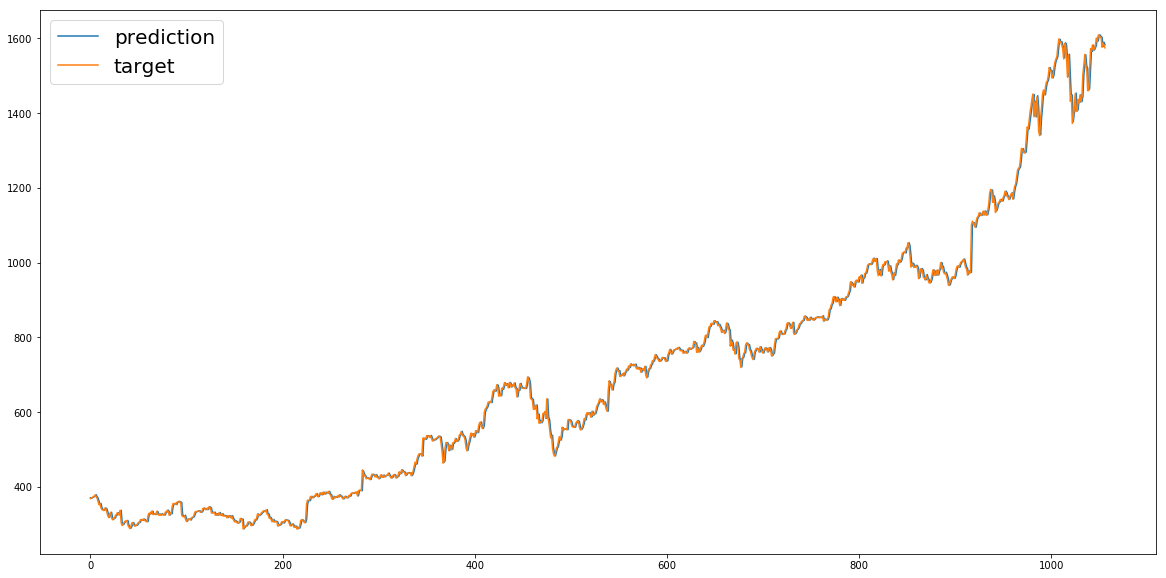

In [37]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [39]:
amazon_review = pd.read_csv('amazon_cells_labelled.tsv', sep='\t')

In [40]:
amazon_review.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [43]:
bow

array([[0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [44]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    ###YOUR CODE HERE###
    vectorizer.fit(data['Review'])
    bow = vectorizer.transform(data['Review']).toarray()

    return vectorizer, bow

In [45]:
vectorizer, bow = make_review_bow(amazon_review)
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
###YOUR CODE HERE###
X_train, X_test, y_train, y_test = train_test_split(bow_df.as_matrix(), amazon_review['Sentiment'].as_matrix(), test_size = 0.2, random_state = 198)

### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
###YOUR CODE HERE###
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [50]:
sgdScore = clf.score(X_test, y_test)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.770000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
###YOUR CODE HERE###
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
nbScore = clf.score(X_test, y_test)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.835000


### Problem 3-6 Select the Best Model with 5 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
classifiers = [
    SGDClassifier(loss = 'hinge'),
    SGDClassifier(loss = 'log'),
    SGDClassifier(loss = 'modified_huber'),
    SGDClassifier(loss = 'squared_hinge', penalty = 'l2'),
    SGDClassifier(loss = 'squared_hinge', penalty = 'l1'),
    MultinomialNB(alpha = 0),
    MultinomialNB(alpha = 1),
    MultinomialNB(alpha = 2)
]

In [56]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(bow_df.as_matrix(), amazon_review['Sentiment'].as_matrix(), test_size = 0.2, random_state = 198)

In [57]:
###YOUR CODE HERE###
max_classifier = ['', 0]

for clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    print(clf, scores.mean(), sep = "\n", end = "\n\n")
    
    if max_classifier[1] < scores.mean():
        max_classifier = [clf, scores.mean()]

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
0.7524530300757519

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
0.7662593752343809

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
0.7512654691367284

SGDClassifier(alpha=0.0001, average=False, cl

C:\Users\Jinhe\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jinhe\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jinhe\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jinhe\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


MultinomialNB(alpha=2, class_prior=None, fit_prior=True)
0.7849659678991974



In [58]:
clf = max_classifier[0]
clf.fit(X_train, y_train)
print(clf, clf.score(X_test, y_test))

MultinomialNB(alpha=1, class_prior=None, fit_prior=True) 0.835


### YOUR ANSWER HERE [reason why you choose that model] ###


SGD-Classifier 와 Naive_bayes 를 비교했을 때 어떤 모델이 더 좋은 성능을 낼지는 두 모델을 각각 돌려봐야 알 것 같아 두 모델을 동시에 돌려 cross-validation 에서 성능이 가장 잘 나오는 모델을 선택하려 했습니다. 또한 두 모델을 각각 cross-validation 으로 평가하면서 SGD-Classifier 의 Loss, 또는 Naive_bayes 의 alpha 값(smoothness 결정)이라는 hyper-parameters 들을 조정해 보았습니다.

In [59]:
###YOUR CODE HERE###
clf = max_classifier[0]
clf.fit(X_train, y_train)
print(clf)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)


In [60]:
score = clf.score(X_test, y_test)
print ("Model Accuracy: %f" % score)

Model Accuracy: 0.835000


## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 4-1 Pick 3 Categories you want and download

In [62]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
categories = [
    'comp.os.ms-windows.misc',
    'rec.sport.hockey',
    'talk.politics.guns'   
]

In [63]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

the 20 newsgroups by date dataset
1157 documents
3 categories


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [64]:
tfidf_vectorizer = TfidfVectorizer().fit(dataset.data)
tfidf_matrix = tfidf_vectorizer.transform(dataset.data)
tfidf_matrix

C:\Users\Jinhe\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


<1157x33874 sparse matrix of type '<class 'numpy.float64'>'
	with 184240 stored elements in Compressed Sparse Row format>

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [65]:
num_clusters = 3
km = KMeans(n_clusters = num_clusters, random_state = 0).fit(tfidf_matrix)
#TODO
clusters = km.labels_.tolist()
print(clusters[:10])

[1, 1, 0, 0, 2, 1, 1, 1, 1, 0]


### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [66]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

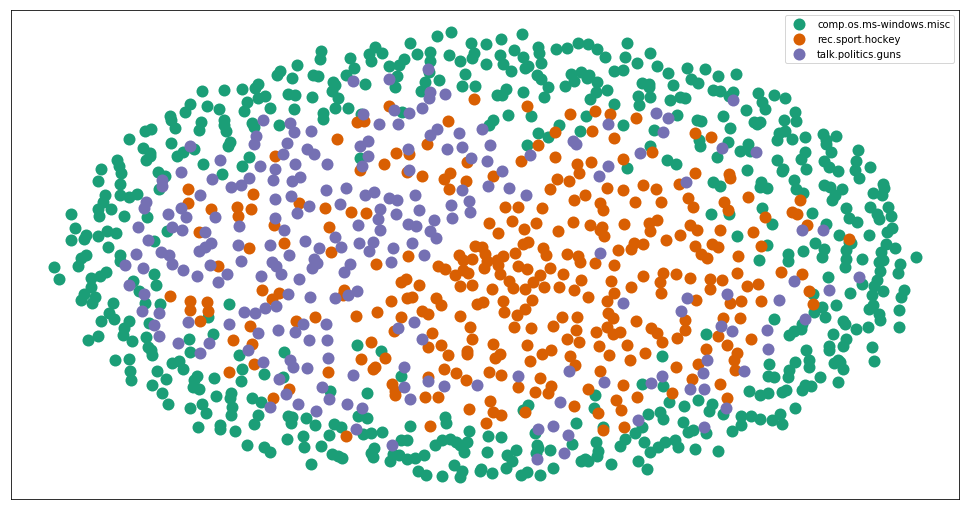

In [67]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name], 
                color= cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)